In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import json

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from yellowbrick.model_selection import FeatureImportances

**Question 1**

In [9]:
login = pd.read_json('logins.json')

In [10]:
login.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
type(login['login_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
rng = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
ts = pd.Series(np.zeros(len(rng)), index=rng)

In [7]:
login= login.sort_values('login_time') # the login times were not in order, so this gets them aright.
login = login.reset_index(drop=True)
login.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [8]:
p = 0 
for i in range(len(login)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    t = login['login_time'][i]
    if s < t < e:
        ts[p] = ts[p] + 1
    else:
        while (e < t): #increment to the next time 
            p = p + 1 
            s = ts.index[p] #change start time
            e = ts.index[p+1] # change end time
        ts[p] = ts[p] + 1

In [9]:
ts.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

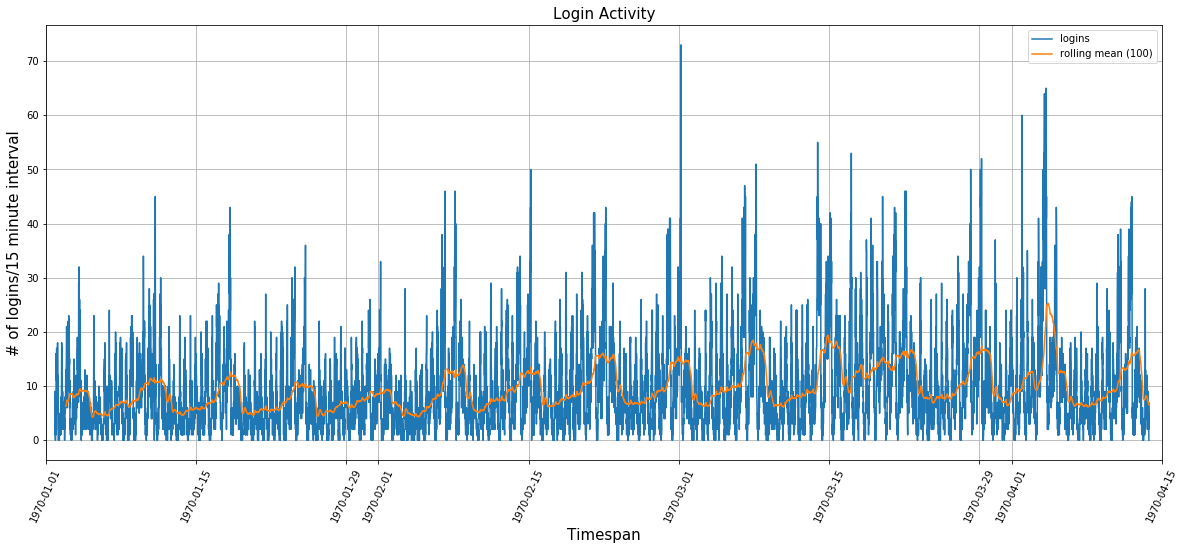

In [10]:
plt.figure(figsize=(20,8))
plt.plot(ts, label='logins')
plt.plot(ts.rolling(window=100).mean(), label='rolling mean (100)')
plt.title('Login Activity',size=15)
plt.ylabel('# of logins/15 minute interval',size=15)
plt.xlabel('Timespan',size=15)
plt.xlim([datetime.date(1970, 1, 1), datetime.date(1970, 4, 15)])
plt.xticks(rotation=65)
plt.grid()
plt.legend()
plt.show()

It seenms that there are regular peaks repeating at likely weekly intervals

**Question 2**

As the cities function differently during the week, the only plausible way is to check the engagement of the drivers during the weekend.

I would track the drivers in the upcoming weeks to the experiment, and then i would announce that the toll is covered for them. 
After that i would compare with the t-test if there is any statistical significance

**Question 3**

In [10]:
with open('ultimate_data_challenge.json') as f:
    data =  json.load(f)
user_data = pd.DataFrame(data)

In [11]:
user_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [12]:
user_data.shape

(50000, 12)

In [13]:
active_users = []
for i in range(len(user_data)):
    st = pd.Timestamp(user_data['signup_date'][i]) 
    et = st + pd.Timedelta('181D') 
    at = et - pd.Timedelta('30D') 
    if at <= pd.Timestamp(user_data['last_trip_date'][i]) <= et:
        active_users.append([1]) 
    else:
        active_users.append([0])
#setting up a new columns with active users after 6 months

In [14]:
df1 = pd.DataFrame(active_users,columns = ['active_users'])

In [15]:
df1['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

In [16]:
df1.head()

,active_users
0,0
1,0
2,0
3,1
4,0


In [17]:
df = pd.concat([user_data, df1], axis = 1)
#creating a new table with combined columns

In [18]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_users
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active_users              50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [20]:
df_clean=df.fillna(method='ffill')
#filling missing data

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active_users              50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [22]:
X= df_clean.iloc[:,0:12]
y= df_clean['active_users']

In [23]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [24]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: active_users, dtype: int64

In [25]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
print(X_df.head())

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False

In [26]:
numeric_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_by_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days','weekday_pct']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['city', 'phone', 'ultimate_black_user']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
forest_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=10, random_state=0))])

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X_df, y_df, test_size=0.2)

X_train_forest.head()
y_train_forest.head()

forest_clf.fit(X_train_forest, y_train_forest)



print("model score: %.3f" % forest_clf.score(X_test_forest, y_test_forest))



model score: 0.790


**The random forest predicts around 80% accuracy for active users on the baseline model**